In this project, we use Deep Reinforcement Learning to train a CartPole in OpenAI Gym environment, until a mean reward of 475 is reached.

In [ ]:
!pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# As examined in the link below, PPO provides the best result for CartPole, compared with DQN, DoubleDQN, A2C, and Reinforce algorithms.
#   https://cse.buffalo.edu/~avereshc/rl_fall20/Comparison_of_RL_Algorithms_vvelivel_sudhirya.pdf , 

import ray
from ray.rllib.agents.ppo import PPOTrainer
Configuration = { "env":"CartPole-v1", # CartPole-v1 OpenAI Gym environment
                  "framework":"tf", # using Tensorflow
                  "model":{"fcnet_hiddens":[50], "fcnet_activation":"relu"} }

In [ ]:
Trainer = PPOTrainer(config=Configuration)
rewardMeans = [0] # The initial set of 'episode_reward_mean'.
Iterations = 200 # Set the maximum number of iterations (setting it high enough so that it reaches episode_reward_mean=475 before iterations end).
for iteration in range(Iterations):
    if rewardMeans[-1] < 475 :   # This will continue the iterations until the last 'episode_reward_mean' is 475.
        Result = Trainer.train()
        rewardMeans.append(Result['episode_reward_mean'])

(pid=4347) 2022-07-07 02:31:55,745	WARNING compression.py:18 -- lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.
2022-07-07 02:31:58,494	WARNING util.py:65 -- Install gputil for GPU system monitoring.
(pid=4388) 2022-07-07 02:32:04,024	WARNING compression.py:18 -- lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.
2022-07-07 02:32:09,563	WARNING deprecation.py:47 -- DeprecationWarning: `slice` has been deprecated. Use `SampleBatch[start:stop]` instead. This will raise an error in the future!


In [ ]:
print('The last reached episode_reward_mean is', rewardMeans[-1])

The last reached episode_reward_mean is 479.63


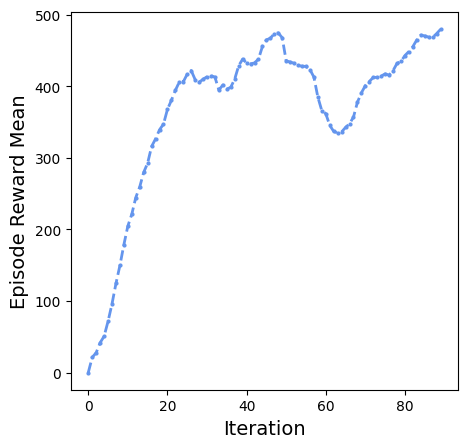

In [ ]:
import matplotlib.pyplot as plt

iterationsList = [i for i in range(len(rewardMeans))]

plt.figure(figsize=(5,5), dpi=100) 

plt.plot( iterationsList, rewardMeans, marker='o', markerfacecolor='cornflowerblue', markersize=2,
                                            linestyle='--', color='cornflowerblue', linewidth=2 )
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Episode Reward Mean", fontsize=14)

plt.show()
